In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Columns = ['waste1','day', 'J', 'Time_step', 'turb.name', 'base_demand', 'Version' , 
               'dec','dec_ideal', 'dec_forecast',
               'cost_stoch_sim','cost_ideal_sim','cost_det_sim',
               'initial_fill_level','final_state_stoch', 'final_state_ideal', 'final_state_det','waste2' ]   


In [65]:
df = pd.DataFrame(columns=Columns)
df = pd.read_table('results/office_pc.txt',header=None,names=['input'])
#df['input'][0].split(',',8) 
df = df['input'].apply(lambda x: pd.Series(x.split(',',8)))

In [66]:
df.rename(columns={0:'waste1',1:'day',2:'J',3:'Time_step',4:'turb.name',5:'base_demand',6:'Version',7:'Filter',8:'rest'},inplace=True)

In [67]:
del df['waste1']

In [68]:
df_2 = df['rest'].apply(lambda x: pd.Series(x.rsplit(',',8)))
df_2.rename(columns={0:'Schedules',1:'cost_stoch_sim',2:'cost_ideal_sim',3:'cost_det_sim',
               4:'initial_fill_level',5:'final_state_stoch',6:'final_state_ideal',7:'final_state_det',8:'waste2'},inplace=True)
dfj = pd.concat([df, df_2],axis=1, join_axes=[df.index])

In [69]:
del dfj['rest'], dfj['waste2']
#dfj
dfj['cost_det_sim'] = dfj['cost_det_sim'].map(lambda x: float(x))
dfj['cost_ideal_sim'] = dfj['cost_ideal_sim'].map(lambda x: float(x))
dfj['cost_stoch_sim'] = dfj['cost_stoch_sim'].map(lambda x: float(x))

In [70]:
days = dfj['day'].tolist(),
Js = dfj['J'].tolist()
time_Steps = dfj['Time_step'].tolist()


In [71]:
df_clean = dfj[(dfj['cost_det_sim'] >= dfj['cost_stoch_sim'])  ]

In [73]:
print dfj.shape, df_clean.shape

(154, 15) (63, 15)


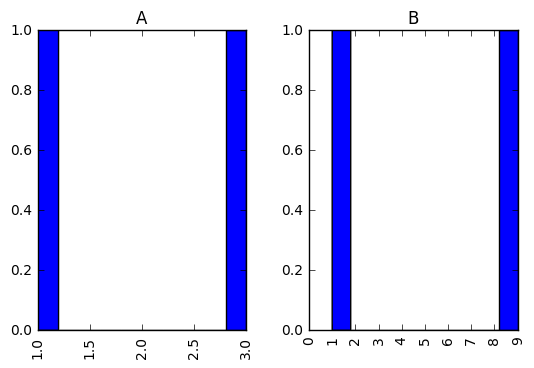

In [75]:
#vals = pd.concat([df_clean['cost_stoch_sim'],df_clean['cost_ideal_sim'],df_clean['cost_det_sim']],axis=1, join_axes=[df_clean.index])



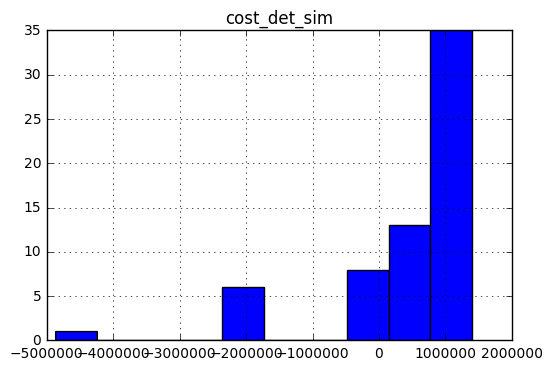

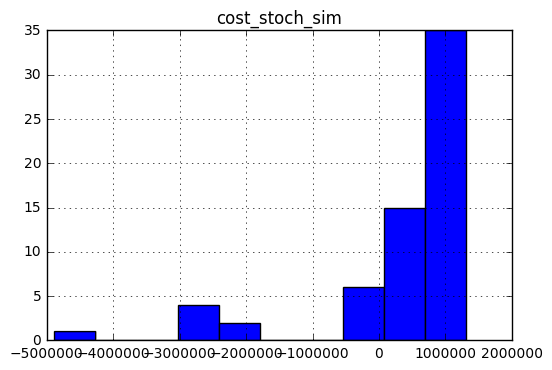

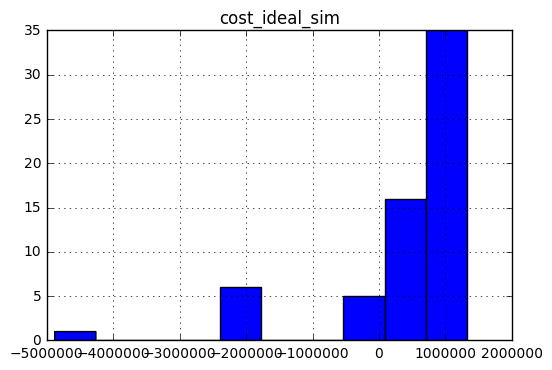

417002.411568 338468.631669 392011.07343
-0.188329318297


C:\Users\ruben\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


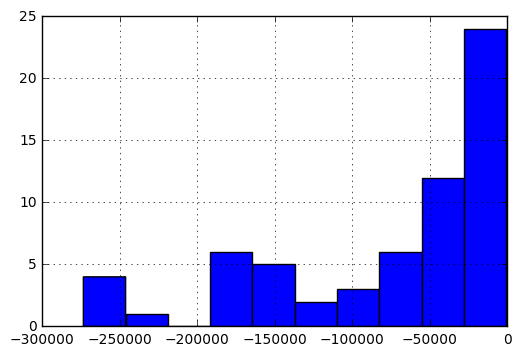

In [80]:
df_clean.hist(column='cost_det_sim')
df_clean.hist(column='cost_stoch_sim')
df_clean.hist(column='cost_ideal_sim')
plt.show()
print df_clean['cost_det_sim'].mean(), df_clean['cost_stoch_sim'].mean(), df_clean['cost_ideal_sim'].mean()
df_clean['diff'] = df_clean['cost_stoch_sim'] - df_clean['cost_det_sim']
print df_clean['diff'].mean()/df_clean['cost_det_sim'].mean()
df_clean['diff'].hist()
plt.show()

385027.386186 374616.589646 396317.356343
-0.0270391066042


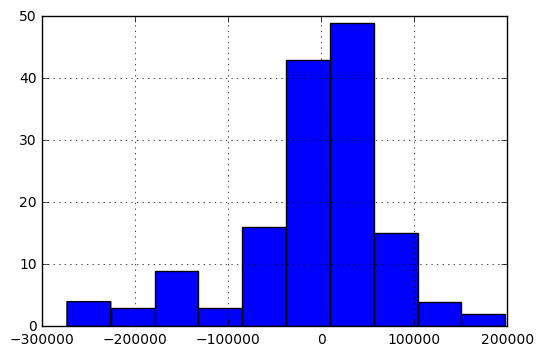

In [81]:
dfj.hist(column='cost_det_sim')
dfj.hist(column='cost_stoch_sim')
dfj.hist(column='cost_ideal_sim')
plt.show()
print dfj['cost_det_sim'].mean(), dfj['cost_stoch_sim'].mean(), dfj['cost_ideal_sim'].mean()
dfj['diff'] = dfj['cost_stoch_sim'] - dfj['cost_det_sim']
print dfj['diff'].mean()/dfj['cost_det_sim'].mean()
dfj['diff'].hist()
plt.show()

## Renerate remainsing cases

In [8]:
days = [int(d[1:]) for d in days[0]]
Js = [int(j[1:]) for j in Js]
time_steps = [t[2:-1] for t in time_Steps]

In [9]:
completed = zip(days,Js,time_steps)
total = [(d,j,t) for d in xrange(365,2*365) for j in [5,11,21,31] for t in ['15T','30T','60T']]
remain = list(set(total) - set(completed))

In [10]:
print len(remain), len(total), len(completed)

4232 4380 154


In [110]:
remain.sort(key=lambda x: x[0])
for i in remain[0:10]:
    print i

(365, 31, '60T')
(365, 31, '15T')
(366, 31, '15T')
(367, 31, '15T')
(368, 31, '30T')
(368, 31, '15T')
(369, 21, '15T')
(369, 31, '15T')
(370, 21, '15T')
(370, 31, '30T')


In [124]:

pwd

'C:\\PhD\\DP'

In [117]:
with open('remaining.txt', 'a') as the_file:
    the_file.write(str(remain))